In [40]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [117]:
train_data = pd.read_csv("poverty/src/data/train.csv")

In [118]:
train_data = train_data.drop(["dependency","edjefe","edjefa"], axis = 1)

In [119]:
train_data.to_csv("poverty/src/data/train.csv", index=False)

In [120]:
test_data = pd.read_csv("poverty/src/data/train.csv")

In [121]:
len(list(test_data))

140

According to the following table, we know that variables rez_esc, v18q1, v2a1, SQBmeaned, and meaneduc contain missing value. <br>
<br>
**rez_esc**: Years behind in school<br>
**v18q1**: number of tablets household owns<br>
**v2a1**: Monthly rent payment<br>
**SQBmeaned**: square of the mean years of education of adults (>=18) in the household<br>
**meaneduc**: average years of education for adults (18+)<br>

In [96]:
# Number of missing in each column
missing = pd.DataFrame(train_data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train_data)

missing.sort_values('percent', ascending = False).head(7)

total   percent
rez_esc      7928  0.829549
v18q1        7342  0.768233
v2a1         6860  0.717798
SQBmeaned       5  0.000523
meaneduc        5  0.000523
Id              0  0.000000
hogar_adul      0  0.000000

## v18q1

In the dataset, we know that v18q indicates whether or not a family owns a tablet, where 0 indicates no tablet and 1 indicates own tablet. When we check v18q and v18q1, we find that when column v18q shows 0, there is a missing value in column v18q1. Then, we suppose that families with a NaN in this category just do not own a tablet. 

In [99]:
train_data[['v18q','v18q1']].head()

v18q  v18q1
0     0    NaN
1     1    1.0
2     0    NaN
3     1    1.0
4     1    1.0

We choose to groupby the value of v18q (which is 1 for owns a tablet and 0 for does not) and then calculate the number of null values for v18q1. This will tell us if the null values represent that the family does not own a tablet.

In [106]:
null_df = train_data.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum()).to_frame(name=None)
null_df.columns = ['num']
null_df

num
v18q      
0     7342
1        0

Therefore, according to the result above, we know that family with NaN in v18q1 means that the family does not own a tablet. To be more specific, we can fill in the missing value with value 0. 

In [107]:
train_data['v18q1'] = train_data['v18q1'].fillna(0)

## v2a1

`v2a1` represents monthly rent payment. <br>
In order to impute the missing values of the monthly rent payment, we also check the relationship between v2a1 and tipovivi which represent the ownership or renting status of the home. <br>
For this plot, we show the ownership status of those homes with a nan for the monthyl rent payment.

In [ ]:
null_v2a1 = data.loc[data['v2a1'].isnull()

may choose to delete 'rez_esc' column

In [4]:
len(train_data['rez_esc']) # 9557 total rows

9557

In [5]:
sum(train_data['rez_esc'].isna())

7928

In [6]:
train_data.isna().any()[lambda x: x]

v2a1         True
v18q1        True
rez_esc      True
meaneduc     True
SQBmeaned    True
dtype: bool

In [7]:
sum(train_data['SQBmeaned'].isna()) # squared of meaneduc

5

In [8]:
sum(train_data['meaneduc'].isna()) ## average years of education for adults

5

In [9]:
sum(train_data['rez_esc'].isna())  ## years behind in school

7928

In [10]:
sum(train_data['v18q1'].isna()) ## number of tablet

7342

In [11]:
train_data['v2a1'].head() ## monthly rent

0    190000.0
1    135000.0
2         NaN
3    180000.0
4    180000.0
Name: v2a1, dtype: float64

In [12]:
# train_data.fillna(0, inplace=True)

In [13]:
# train_data = train_data.drop("rez_esc", axis = 1)

In [14]:
len(list(train_data))

143

In [16]:
train_data.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0   ...            100    1849               1        100             0   
1     0   ...            144    4489               1        144             0   
2     0   ...            121    8464               1          0             0   
3     0   ...             81     289              16        121             4   
4     0   ...            121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [33]:
test_data = train_data[['v18q1','Target']].dropna()
test_data.head()

v18q1  Target
1    1.0       4
3    1.0       4
4    1.0       4
5    1.0       4
6    1.0       4

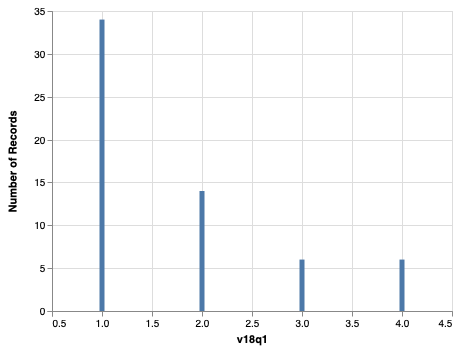

In [47]:
test_data_1 = test_data.loc[test_data.Target== 1]
target_1 = alt.Chart(test_data_1).mark_bar().encode(
    x = "v18q1",
    y = "count()"
)
target_1

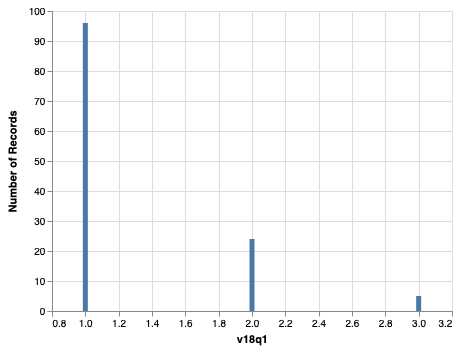

In [49]:
test_data_2 = test_data.loc[test_data.Target== 2]
target_2 = alt.Chart(test_data_2).mark_bar().encode(
    x = "v18q1",
    y = "count()"
)
target_2

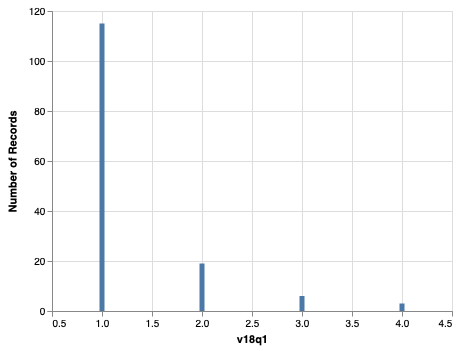

In [51]:
test_data_3 = test_data.loc[test_data.Target== 3]
target_3 = alt.Chart(test_data_3).mark_bar().encode(
    x = "v18q1",
    y = "count()"
)
target_3

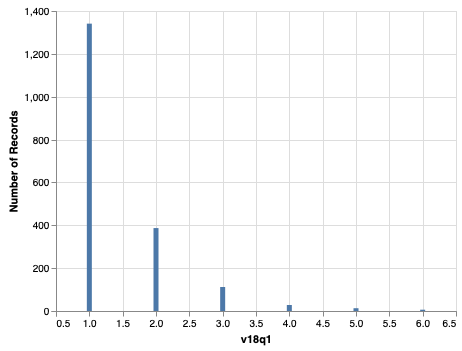

In [52]:
test_data_4 = test_data.loc[test_data.Target== 4]
target_4 = alt.Chart(test_data_4).mark_bar().encode(
    x = "v18q1",
    y = "count()"
)
target_4

In [89]:
poverty_data = pd.read_csv("poverty/src/data/poverty_data.csv")

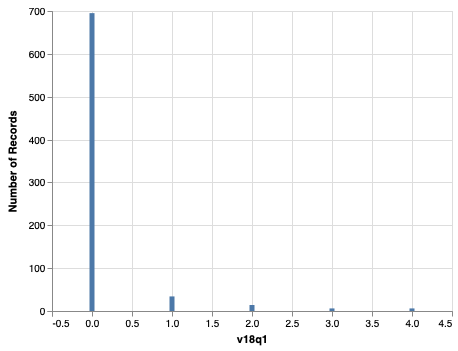

In [55]:
poverty_data_1 = poverty_data.loc[poverty_data.Target== 1]
poverty_1 = alt.Chart(poverty_data_1).mark_bar().encode(
    x = "v18q1",
    y = "count()"
)
poverty_1

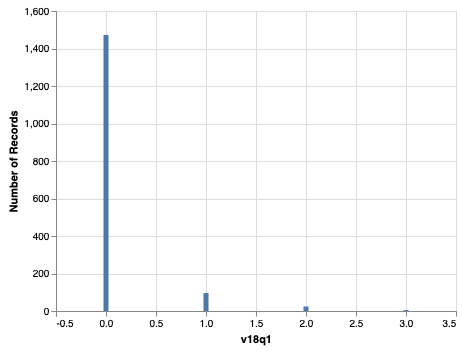

In [56]:
poverty_data_2 = poverty_data.loc[poverty_data.Target== 2]
poverty_2 = alt.Chart(poverty_data_2).mark_bar().encode(
    x = "v18q1",
    y = "count()"
)
poverty_2

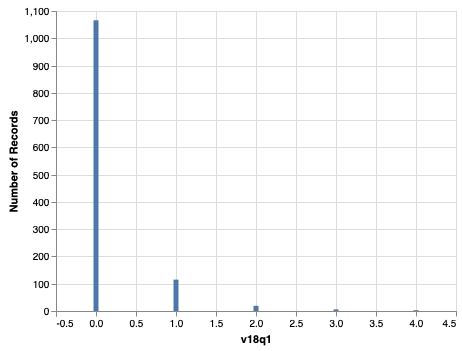

In [61]:
poverty_data_3 = poverty_data.loc[poverty_data.Target== 3]
poverty_3 = alt.Chart(poverty_data_3).mark_bar().encode(
    x = "v18q1",
    y = "count()"
)
poverty_3

In [85]:
poverty_data_2 = poverty_data.loc[poverty_data.Target == 2]
print(set(poverty_data_2['v18q1']))
poverty_2_dict = {
    '0': list(poverty_data_2['v18q1']).count(0.0),
    '1': list(poverty_data_2['v18q1']).count(1.0),
    '2': list(poverty_data_2['v18q1']).count(2.0),
    '3': list(poverty_data_2['v18q1']).count(3.0)
}
poverty_2_dict

{0.0, 1.0, 2.0, 3.0}


{'0': 1472, '1': 96, '2': 24, '3': 5}

In [88]:
total_2 = 1472+ 96+24+5
print('percentage of 0: ' + str(1472/total_2))
print('percentage of 1: ' + str(96/total_2))
print('percentage of 2: ' + str(24/total_2))
print('percentage of 3: ' + str(5/total_2))

percentage of 0: 0.9217282404508453
percentage of 1: 0.06011271133375078
percentage of 2: 0.015028177833437696
percentage of 3: 0.0031308703819661866


In [78]:
poverty_data_3 = poverty_data.loc[poverty_data.Target == 3]
print(set(poverty_data_3['v18q1']))
poverty_3_dict = {
    '0': list(poverty_data_3['v18q1']).count(0.0),
    '1': list(poverty_data_3['v18q1']).count(1.0),
    '2': list(poverty_data_3['v18q1']).count(2.0),
    '3': list(poverty_data_3['v18q1']).count(3.0),
    '4': list(poverty_data_3['v18q1']).count(4.0)
}
poverty_3_dict

{0.0, 1.0, 2.0, 3.0, 4.0}


{'0': 1066, '1': 115, '2': 19, '3': 6, '4': 3}

In [90]:
total_3 = 1066+ 115+19+6+3
print('percentage of 0: ' + str(1066/total_3))
print('percentage of 1: ' + str(115/total_3))
print('percentage of 2: ' + str(19/total_3))
print('percentage of 3: ' + str(6/total_3))
print('percentage of 3: ' + str(3/total_3))

percentage of 0: 0.8817204301075269
percentage of 1: 0.09511993382961124
percentage of 2: 0.015715467328370553
percentage of 3: 0.004962779156327543
percentage of 3: 0.0024813895781637717


In [76]:
poverty_data_4 = poverty_data.loc[poverty_data.Target == 4]
print(set(poverty_data_4['v18q1']))
poverty_4_dict = {
    '0': list(poverty_data_4['v18q1']).count(0.0),
    '1': list(poverty_data_4['v18q1']).count(1.0),
    '2': list(poverty_data_4['v18q1']).count(2.0),
    '3': list(poverty_data_4['v18q1']).count(3.0),
    '4': list(poverty_data_4['v18q1']).count(4.0),
    '5': list(poverty_data_4['v18q1']).count(5.0),
    '6': list(poverty_data_4['v18q1']).count(6.0)
}
poverty_4_dict

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}


{'0': 4109, '1': 1341, '2': 387, '3': 112, '4': 28, '5': 13, '6': 6}

In [83]:
total = 4109+ 1341+387+112+28+13+6
print('percentage of 0: ' + str(4109/total))
print('percentage of 1: ' + str(1341/total))

percentage of 0: 0.6852901934623082
percentage of 1: 0.22364909939959973


## Combine data

In [123]:
# train_data = train_data.drop("tamhog", axis = 1) ## repetitive data: tamhog & hhsize 

In [124]:
def pretreat_data(train_data):
    train_data = train_data.drop("tamhog", axis = 1)
    train_data = train_data.drop("rez_esc", axis = 1)
    train_data.fillna(0, inplace=True)
    
    return train_data

In [125]:
# test
len(list(train_data))

143

In [126]:
def fill_outside_wall_material(row):
    if row['paredblolad'] == 1:
        return 'block or brick'
    if row['paredzocalo'] == 1:
        return 'socket'
    if row['paredpreb'] == 1:
        return 'prefabricated or cement'
    if row['pareddes'] == 1:
        return 'waste matrial'
    if row['paredmad'] == 1:
        return 'wood'
    if row['paredzinc'] == 1:
        return 'zink'
    if row['paredfibras'] == 1:
        return 'natural fibers'
    if row['paredother'] == 1:
        return 'other'

In [127]:
def fill_floor_material(row):
    if row['pisomoscer'] == 1:
        return 'mosaic, ceramic, terrazo'
    if row['pisocemento'] == 1:
        return 'cement'
    if row['pisoother'] == 1:
        return 'other'
    if row['pisonatur'] == 1:
        return 'natural material'
    if row['pisonotiene'] == 1:
        return 'no floor'
    if row['pisomadera'] == 1:
        return 'wood'

In [128]:
def fill_roof_material(row):
    if row['techozinc'] == 1:
        return 'metal foil or zink'
    if row['techoentrepiso'] == 1:
        return 'fiber cement or mezzanine'
    if row['techocane'] == 1:
        return 'natural fibers'
    if row['techootro'] == 1:
        return 'other'
    if row['cielorazo'] != 1:
        return 'no ceiling'

In [129]:
def fill_water_provision(row):
    if row['abastaguadentro'] == 1:
        return 'inside the wall'
    if row['abastaguafuera'] == 1:
        return 'outside the wall'
    if row['abastaguano'] == 1:
        return 'no provision'

In [130]:
def fill_electricity_source(row):
    if row['public'] == 1:
        return 'CNFL, ICE, ESPH/JASEC'
    if row['planpri'] == 1:
        return 'private plant'
    if row['noelec'] == 1:
        return 'no electricity'
    if row['coopele'] == 1:
        return 'cooperative'

In [131]:
def fill_toilet(row):
    if row['sanitario1'] == 1:
        return 'no toilet'
    if row['sanitario2'] == 1:
        return 'sewer or cesspool'
    if row['sanitario3'] == 1:
        return 'septic tank'
    if row['sanitario5'] == 1:
        return 'black hole or letrine'
    if row['sanitario6'] == 1:
        return 'other system'

In [132]:
def fill_cooking_energy_source(row):
    if row['energcocinar1'] == 1:
        return 'no kitchen'
    if row['energcocinar2'] == 1:
        return 'electricity'
    if row['energcocinar3'] == 1:
        return 'gas'
    if row['energcocinar4'] == 1:
        return 'wood charocal'

In [133]:
def fill_rubbish_disposal(row):
    if row['elimbasu1'] == 1:
        return 'tanker trunck'
    if row['elimbasu2'] == 1:
        return 'botan hollow or buried'
    if row['elimbasu3'] == 1:
        return 'burning'
    if row['elimbasu4'] == 1:
        return 'unoccupied space'
    if row['elimbasu5'] == 1:
        return 'river, creek, or sea'
    if row['elimbasu6'] == 1:
        return 'other'

In [134]:
def fill_wall_quality(row):
    if row['epared1'] == 1:
        return 'bad'
    if row['epared2'] == 1:
        return 'regular'
    if row['epared3'] == 1:
        return 'good'

In [135]:
def fill_roof_quality(row):
    if row['etecho1'] == 1:
        return 'bad'
    if row['etecho2'] == 1:
        return 'regular'
    if row['etecho3'] == 1:
        return 'good'

In [136]:
def fill_floor_quality(row):
    if row['eviv1'] == 1:
        return 'bad'
    if row['eviv2'] == 1:
        return 'regular'
    if row['eviv3'] == 1:
        return 'good'

In [137]:
def fill_gender(row):
    if row['male'] == 1:
        return 'male'
    if row['female'] == 1:
        return 'female'

In [138]:
def fill_civil_status(row):
    if row['estadocivil1'] == 1:
        return 'less than 10 years old'
    if row['estadocivil2'] == 1:
        return 'free or coupled union'
    if row['estadocivil3'] == 1:
        return 'married'
    if row['estadocivil4'] == 1:
        return 'divorced'
    if row['estadocivil5'] == 1:
        return 'separated'
    if row['estadocivil6'] == 1:
        return 'widow/er'
    if row['estadocivil7'] == 1:
        return 'single'

In [139]:
def fill_relationship(row):
    if row['parentesco1'] == 1:
        return 'household head'
    if row['parentesco2'] == 1:
        return 'spouse/partner'
    if row['parentesco3'] == 1:
        return 'son/daughter'
    if row['parentesco4'] == 1:
        return 'stepson/daughter'
    if row['parentesco5'] == 1:
        return 'son/daughter in law'
    if row['parentesco6'] == 1:
        return 'grandson/daughter'
    if row['parentesco7'] == 1:
        return 'mother/father'
    if row['parentesco8'] == 1:
        return 'father/mother in law'
    if row['parentesco9'] == 1:
        return 'brother/sister'
    if row['parentesco10'] == 1:
        return 'brother/sister in law'
    if row['parentesco11'] == 1:
        return 'other family member'
    if row['parentesco12'] == 1:
        return 'other non family member'

In [140]:
def fill_education_level(row):
    if row['instlevel1'] == 1:
        return 'no level of education'
    if row['instlevel2'] == 1:
        return 'incomplete primary'
    if row['instlevel3'] == 1:
        return 'complete primary'
    if row['instlevel4'] == 1:
        return 'incomplete academic secondary level'
    if row['instlevel5'] == 1:
        return 'complete academic secondary level'
    if row['instlevel6'] == 1:
        return 'incomplete technical secondary level'
    if row['instlevel7'] == 1:
        return 'complete technical secondary level'
    if row['instlevel8'] == 1:
        return 'undergraduate and higher education'
    if row['instlevel9'] == 1:
        return 'postgraduate higher education'

In [141]:
def fill_type(row):
    if row['tipovivi1'] == 1:
        return 'own and fully paid house'
    if row['tipovivi2'] == 1:
        return 'own, paying in installments'
    if row['tipovivi3'] == 1:
        return 'rented'
    if row['tipovivi4'] == 1:
        return 'precarious'
    if row['tipovivi5'] == 1:
        return 'other, assigned or borrowed'

In [142]:
def fill_place(row):
    if row['lugar1'] == 1:
        return 'Central'
    if row['lugar2'] == 1:
        return 'Chorotega'
    if row['lugar3'] == 1:
        return 'Pacifico central'
    if row['lugar4'] == 1:
        return 'Brunca'
    if row['lugar5'] == 1: 
        return 'Huetar Atlantica'
    if row['lugar6'] == 1:
        return 'Huetar Norte'

In [143]:
def fill_area(row):
    if row['area1'] == 1:
        return 'urban'
    if row['area2'] == 1:
        return 'rural'

In [144]:
def combine_dummy_feature(train_data):
    train_data['outside_wall_material'] = train_data.apply (lambda row: fill_outside_wall_material(row),axis=1)
    train_data['floor_material'] = train_data.apply (lambda row: fill_floor_material(row),axis=1)    
    train_data['roof_material'] = train_data.apply (lambda row: fill_roof_material(row),axis=1)
    train_data['water_provision'] = train_data.apply (lambda row: fill_water_provision(row),axis=1)
    train_data['electricity_source'] = train_data.apply (lambda row: fill_electricity_source(row),axis=1)
    train_data['toilet'] = train_data.apply (lambda row: fill_toilet(row),axis=1)
    train_data['cooking_energy_source'] = train_data.apply (lambda row: fill_cooking_energy_source(row),axis=1)
    train_data['rubbish_disposal'] = train_data.apply (lambda row: fill_rubbish_disposal(row),axis=1)
    train_data['wall_quality'] = train_data.apply (lambda row: fill_wall_quality(row),axis=1)
    train_data['roof_quality'] = train_data.apply (lambda row: fill_roof_quality(row),axis=1)
    train_data['floor_quality'] = train_data.apply (lambda row: fill_floor_quality(row),axis=1)  
    train_data['gender'] = train_data.apply (lambda row: fill_gender(row),axis=1)
    train_data['civil_status'] = train_data.apply (lambda row: fill_civil_status(row),axis=1)
    train_data['relationship'] = train_data.apply (lambda row: fill_relationship(row),axis=1)    
    train_data['education_level'] = train_data.apply (lambda row: fill_education_level(row),axis=1)
    train_data['type'] = train_data.apply (lambda row: fill_type(row),axis=1)
    train_data['place'] = train_data.apply (lambda row: fill_place(row),axis=1)    
    train_data['area'] = train_data.apply (lambda row: fill_area(row),axis=1)
    
    return train_data

In [145]:
def drop_dummy_col(train_data):
    wall_lst = ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']
    floor_lst = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']
    roof_lst = ['techozinc','techoentrepiso','techocane','techootro','cielorazo']
    water_provision_lst = ['abastaguadentro','abastaguafuera','abastaguano']
    electricity_lst = ['public','planpri','noelec','coopele']
    toilet_lst = ['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6']
    energy_lst = ['energcocinar1','energcocinar2','energcocinar3','energcocinar4']
    disposal_lst = ['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6']
    walls_quality_lst = ['epared1','epared2','epared3']
    roof_quality_lst = ['etecho1','etecho2','etecho3']
    floor_quality_lst = ['eviv1','eviv2','eviv3']
    gender_lst = ['male','female']
    status_lst = ['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7']
    relationship_lst = ['parentesco1','parentesco2','parentesco3','parentesco4','parentesco5','parentesco6','parentesco7','parentesco8','parentesco9',
                'parentesco10','parentesco11','parentesco12']
    education_lst = ['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9']
    type_lst = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
    region_lst = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
    area_lst = ['area1','area2']
    
    train_data = train_data.drop(wall_lst, axis = 1)
    train_data = train_data.drop(floor_lst, axis = 1)
    train_data = train_data.drop(roof_lst, axis = 1)
    train_data = train_data.drop(water_provision_lst, axis = 1)
    train_data = train_data.drop(electricity_lst, axis = 1)
    train_data = train_data.drop(toilet_lst, axis = 1)
    train_data = train_data.drop(energy_lst, axis = 1)
    train_data = train_data.drop(disposal_lst, axis = 1)
    train_data = train_data.drop(walls_quality_lst, axis = 1)
    train_data = train_data.drop(roof_quality_lst, axis = 1)
    train_data = train_data.drop(floor_quality_lst, axis = 1)
    train_data = train_data.drop(gender_lst, axis = 1)
    train_data = train_data.drop(status_lst, axis = 1)
    train_data = train_data.drop(relationship_lst, axis = 1)    
    train_data = train_data.drop(education_lst, axis = 1)
    train_data = train_data.drop(type_lst, axis = 1)
    train_data = train_data.drop(region_lst, axis = 1)
    train_data = train_data.drop(area_lst, axis = 1)
    
    return train_data

In [147]:
def clean_dataframe(train_data):
    train_data = pretreat_data(train_data)
    clean_data = combine_dummy_feature(train_data)
    clean_data = drop_dummy_col(clean_data)
    
    return clean_data

In [148]:
clean_data = clean_dataframe(train_data)

In [155]:
clean_data.to_csv("poverty/src/data/poverty_data.csv", index=False)